Nama : Muhammad Alvi Fikri<br>
Abs/Kelas : 22/TI-3E<br>
NIM : 2141720190

# Import Library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [2]:
#import dataset MNIST menggunakan TensorFlow
from tensorflow.keras.datasets import mnist

In [3]:
# memuat data latih dan uji dari dataset MNIST menggunakan TensorFlow
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [5]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [6]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [7]:
# Check the label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [8]:
#menggabungkan data latih dan uji dari dataset MNIST ke dalam satu set data dan label
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [9]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [10]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 6')

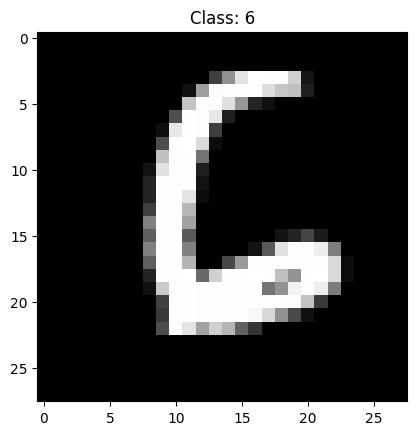

In [11]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

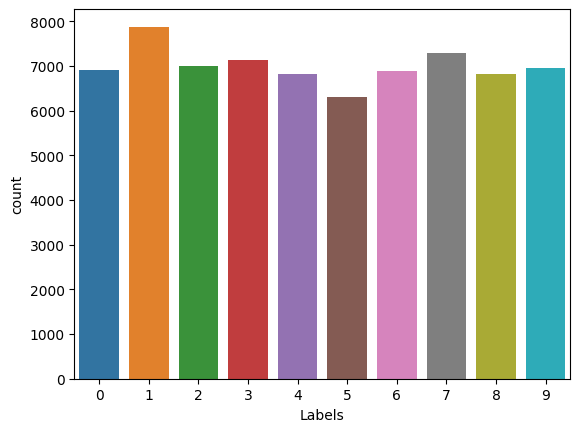

In [12]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-01 10:35:08--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   135MB/s    in 1.4s    

2023-12-01 10:35:10 (135 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [15]:
#read data csv dari kaggle dengan tipe float32
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Get pixel data only (mendapatkan piksel dari data alfabet)
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only (mendapatkan label dari data alfabet)
alphabet_labels = dataset_az['0']

In [17]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [18]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [19]:
# Reshape pixel data to 28*28 untuk menyesuaikan format data dengan citra pada dataset MNIST
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

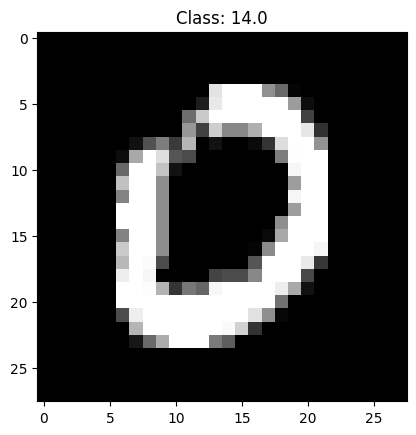

In [20]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

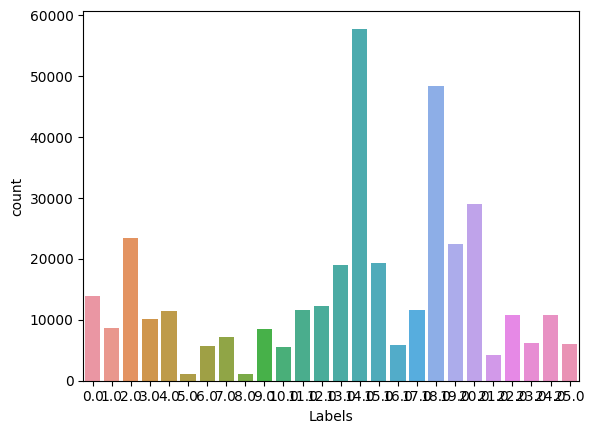

In [21]:
# Check data distribution - distribusi/persebaran data alfabet
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [31]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [32]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [33]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [34]:
# check alphabet labels again
np.unique(alphabet_labels)

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45.],
      dtype=float32)

In [35]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [36]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [37]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45.], dtype=float32)

In [38]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [39]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [40]:
# Normalize data (normalisasi untuk mengurangi efek perbedaan iluminasi)
data /= 255.0

In [41]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [42]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [43]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

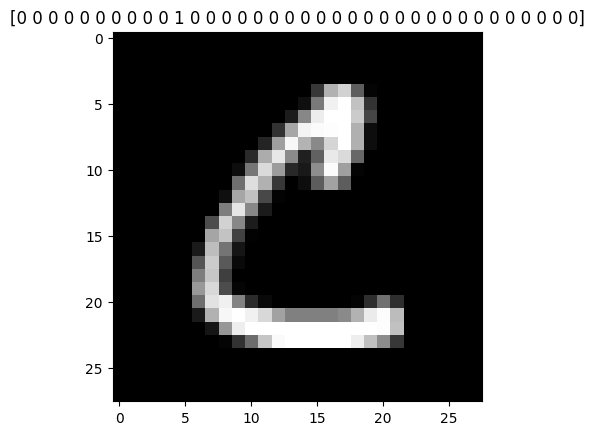

In [44]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [45]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [46]:
# Check the biggest value of data
classes_total.max()

57825

In [47]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [57]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [59]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [60]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [61]:
# Check network summary
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [62]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [63]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [64]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [65]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1557 - accuracy: 0.8281
Epoch 1: val_loss improved from inf to 0.22695, saving model to custom_ocr.model
2765/2765 [==============================] - 158s 53ms/step - loss: 2.1557 - accuracy: 0.8281 - val_loss: 0.2270 - val_accuracy: 0.9111
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9728 - accuracy: 0.9018
Epoch 2: val_loss did not improve from 0.22695
2765/2765 [==============================] - 142s 51ms/step - loss: 0.9728 - accuracy: 0.9018 - val_loss: 0.2850 - val_accuracy: 0.8718
Epoch 3/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.8174 - accuracy: 0.9147
Epoch 3: val_loss improved from 0.22695 to 0.16816, saving model to custom_ocr.model
2765/2765 [==============================] - 148s 54ms/step - loss: 0.8174 - accuracy: 0.9147 - val_loss: 0.1682 - val_accuracy: 0.9368
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7243 - accu

# Evaluate Model

## Make a Single Prediction

In [66]:
# make a prediction - prediksi menggunakan model neural network pada dataset pengujian 'X_test'
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [67]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1] # mengakses hasil prediksi untuk sampel pertama (indeks ke-1)

array([8.68249336e-17, 2.36609665e-08, 4.74027182e-08, 6.01798993e-12,
       4.47668375e-10, 4.63649990e-08, 1.94740519e-15, 1.53872666e-08,
       6.57614544e-12, 1.97457189e-10, 1.11209472e-10, 3.31825415e-13,
       8.27274499e-11, 1.69171503e-08, 1.10332932e-09, 4.14468238e-09,
       2.62821397e-11, 1.22971978e-12, 9.96954441e-01, 3.03477421e-03,
       3.19766852e-11, 9.11450329e-08, 3.50298376e-13, 3.31190761e-12,
       7.05726810e-10, 5.42256568e-14, 7.92229407e-15, 2.70866229e-13,
       6.57165478e-09, 1.04219434e-05, 1.04902675e-11, 6.58101917e-18,
       2.16975066e-11, 7.62526986e-10, 1.22992878e-08, 1.01377346e-07],
      dtype=float32)

In [68]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1]) # mengambil indeks dengan nilai maksimum dari array 'predictions[1]'

18

In [69]:
# Check label for 24
name_labels[18] # akses elemen ke-18 dari list 'name_labels'

'I'

In [70]:
# Check y_test label for 0
y_test[1] # Mengakses label sebenarnya dari sampel pertama dalam dataset pengujian.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
# check the highest value
np.argmax(y_test[1]) # mengambil indeks dengan nilai maksimum dari array 'y_test[1]'

18

In [72]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])] # mengakses karakter yang sesuai dengan kelas sebenarnya dari sampel ke-18 dalam dataset pengujian

'S'

## Make an Evaluation on Test Data

In [73]:
# Evaluate on test data
network.evaluate(X_test, y_test) # mengevaluasi kinerja model pada dataset pengujian

2766/2766 [==============================] - 11s 4ms/step - loss: 0.1659 - accuracy: 0.9348


[0.1659334897994995, 0.9348400831222534]

In [74]:
# Print Classification Report
# mencetak laporan klasifikasi yang menyediakan informasi rinci tentang kinerja model
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.25      0.70      0.36      1381
           1       0.97      0.99      0.98      1575
           2       0.86      0.98      0.91      1398
           3       0.92      0.99      0.96      1428
           4       0.86      0.98      0.92      1365
           5       0.72      0.92      0.81      1263
           6       0.97      0.97      0.97      1375
           7       0.96      0.99      0.98      1459
           8       0.95      0.98      0.97      1365
           9       0.97      0.99      0.98      1392
           A       0.99      0.99      0.99      2774
           B       0.91      1.00      0.95      1734
           C       0.99      0.98      0.99      4682
           D       0.93      0.94      0.94      2027
           E       0.99      0.99      0.99      2288
           F       0.97      1.00      0.99       233
           G       0.93      0.96      0.95      1152
           H       0.97    

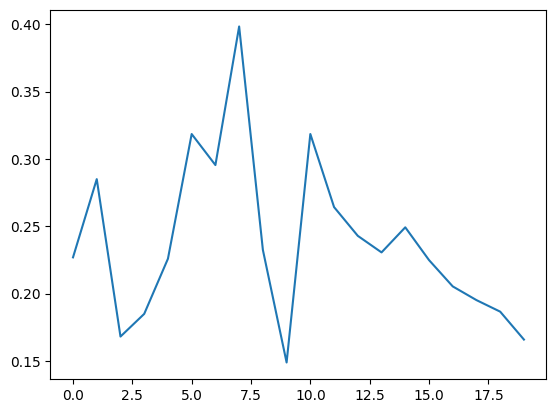

In [75]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])
# menggambar atau ploting kurva kerugian pada dataset pengujian selama pelatihan model

In [76]:
# You can also check the another metrics
history.history.keys()
# mengakses kunci-kunci 'keys' yang tersedia dalam objek history setelah pelatihan model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

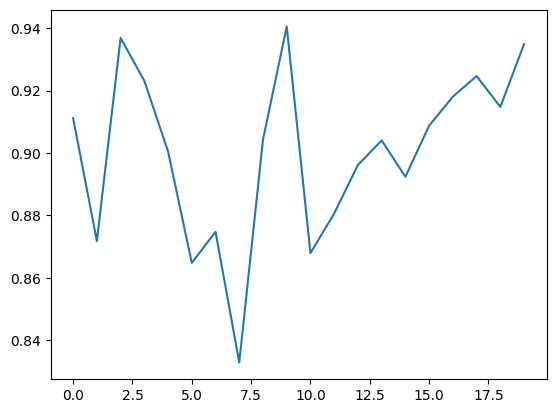

In [77]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])
# menggambar atau memplot kurva akurasi pada dataset pengujian selama pelatihan model

# Save The Model

In [78]:
# The result will show in colab directory
network.save('network', save_format= 'h5')
# menyimpan seluruh model neural network ke dalam file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [84]:
# Import library
from tensorflow.keras.models import load_model
# mengimpor fungsi load_model dari modul 'models'

In [85]:
# Load saved network
load_network = load_model('network')
# load model neural network yang telah disimpan sebelumnya ke dalam variabel 'load_network'

In [86]:
# Check summary
load_network.summary()
# menampilkan ringkasan (summary) dari arsitektur model neural network yang telah dimuat kembali ke dalam variabel 'load_network'

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

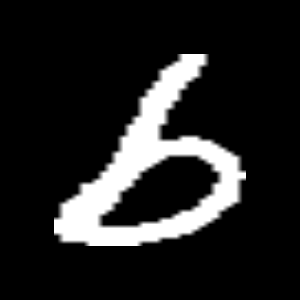

In [87]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [88]:
# Check shape
img.shape
# mendapatkan bentuk (shape) dari suatu array atau tensor 'img'

(300, 300, 3)

In [89]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

# konversi warna citra dari format BGR (Blue, Green, Red) ke citra keabuan (grayscale) menggunakan OpenCV

(300, 300)

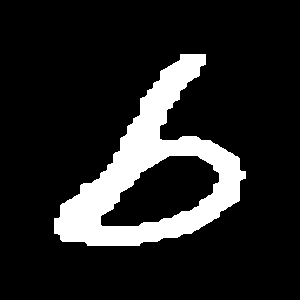

120.0


In [90]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

# segmentasi citra menggunakan metode thresholding otomatis Otsu

In [91]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [92]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

# mengubah tipe data citra 'img_resize' menjadi 'float32'
# melakukan normalisasi nilai piksel
# menambah dimensi kedalaman (depth) ke citra

(28, 28, 1)

In [93]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

# reshape citra input 'img_input' menjadi bentuk yang sesuai untuk dimasukkan ke dalam model neural network

(1, 28, 28, 1)

In [94]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

# prediksi menggunakan model neural network yang telah dimuat kembali 'load_network' pada citra input 'img_input'

1/1 [==============================] - 0s 161ms/step


11

In [95]:
# check label for 6
name_labels[6]
# mengakses label kelas yang sesuai dengan indeks ke-6

'6'

## Kesimpulan
Kode program di atas melakukan pengolahan data dan pembuatan model Convolutional Neural Network (CNN) dengan menggabungkan dataset MNIST dan Kaggle A-Z. Model CNN kemudian dilatih, dievaluasi, dan disimpan untuk penggunaan selanjutnya. Hasil dari model ini diuji pada gambar b_small.jpg dan menghasilkan prediksi nilai 6, sesuai dengan label ke-6 dalam daftar name_labels, yang merepresentasikan huruf G.